<a href="https://colab.research.google.com/github/ramses2099/projectpytorch/blob/main/Simple_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [20]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower ) --> Hidden Layer1 (number of neurons) --> H2 (n) --> output (3 classes of iris flowers)
  def __init__(self, in_features=4, h1=8, h2=9, out_feature=3):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_feature)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)
    return x

In [21]:
# pick a manual seed for randomization
torch.manual_seed(41)
# create a instance of model
model = Model()

In [22]:
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"

In [23]:
df = pd.read_csv(url)

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
# change last column values to string two int
df['species'] = df['species'].replace({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [43]:
# Train Test Split! Set X, y
X = df.drop('species', axis=1)
y = df['species'].values

In [44]:
# Convert these to numpy arrays
X.values
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=41)

In [45]:
# Convert X feauters to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [46]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [47]:
# Set the criterion of model to measure
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = learning rate (if error doesn't go dow after a bunch)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [52]:
from os import EX_PROTOCOL
# Train our model
# Epoch? (one run thru all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Forward pass
  y_pred = model.forward(X_train)
  # Loss
  loss = criterion(y_pred, y_train)

  losses.append(loss.detach().numpy())
  # Backward pass
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 0.00903741829097271
Epoch 10 and loss 0.008615588769316673
Epoch 20 and loss 0.008653796277940273
Epoch 30 and loss 0.007937375456094742
Epoch 40 and loss 0.007401105482131243
Epoch 50 and loss 0.007080807350575924
Epoch 60 and loss 0.006726674735546112
Epoch 70 and loss 0.006521536968648434
Epoch 80 and loss 0.006200295872986317
Epoch 90 and loss 0.00588409136980772


Text(0.5, 0, 'Epoch')

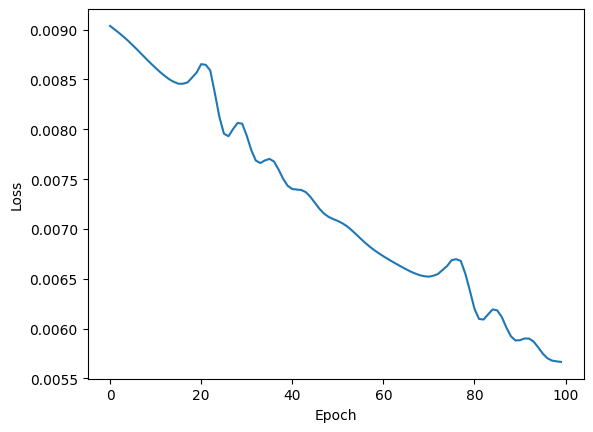

In [53]:
# Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')